In [1]:
#Importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("train.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Finding The sum of null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
value=data["Age"].mode()
value

0    24.0
dtype: float64

In [7]:
#Replacing the nan value in age and Embarked with their mode value
data=data.fillna({'Age':value[0]})
data=data.fillna({"Embarked":data['Embarked'].mode()[0]})


In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Dropping the cabin,ticket and passengerId columns
data_new=data.drop(['Cabin','Ticket','PassengerId'],inplace=False,axis=1)


In [10]:
data_new

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


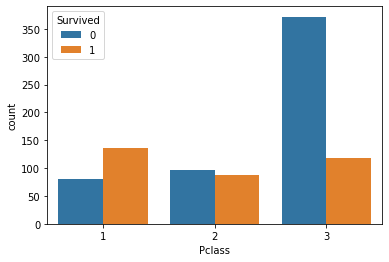

In [11]:
#Graph of Pclass with respect to Survived
import seaborn as sns
sns.countplot(data=data_new,x='Pclass',hue='Survived');

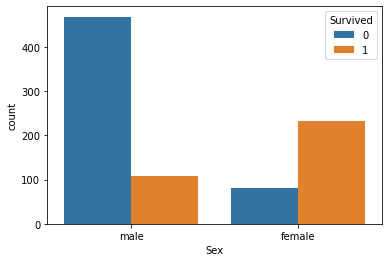

In [12]:
#Graph of Gender with Respect of Survived
sns.countplot(data=data_new,x='Sex',hue='Survived');

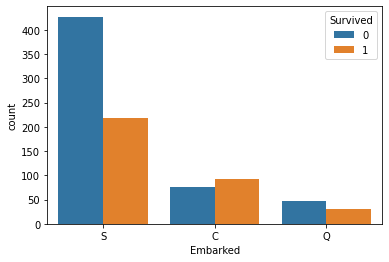

In [13]:
#Graph of Embarked with respect to Survived
sns.countplot(data=data_new,x='Embarked',hue='Survived');

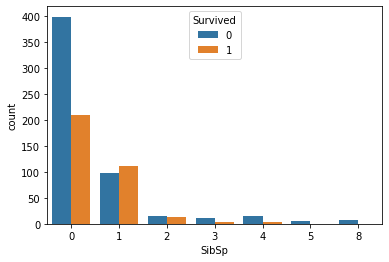

In [14]:
#Graph of SibSp with respect o Survived
sns.countplot(data=data_new,x='SibSp',hue='Survived');

In [15]:
#Converting the Sex column into numerical value
Sex=pd.get_dummies(data_new['Sex'])
Sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [16]:
#Converting the Embarked column into numerical Values
Embarked=pd.get_dummies(data_new['Embarked'])
Embarked.drop(['C'],axis=1,inplace=True)
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [17]:
#Dropping original Embarked,Sex and Name column
data1=data_new.drop(['Embarked','Sex','Name'],axis=1)


In [18]:
data1=pd.concat([Embarked,Sex,data1],axis=1)
data1


,Q,S,female,male,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,1,0,3,22.0,1,0,7.2500
1,0,0,1,0,1,1,38.0,1,0,71.2833
2,0,1,1,0,1,3,26.0,0,0,7.9250
3,0,1,1,0,1,1,35.0,1,0,53.1000
4,0,1,0,1,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,2,27.0,0,0,13.0000
887,0,1,1,0,1,1,19.0,0,0,30.0000
888,0,1,1,0,0,3,24.0,1,2,23.4500
889,0,0,0,1,1,1,26.0,0,0,30.0000


In [19]:
#Finding correlation between various columns
data1.corr()

,Q,S,female,male,Survived,Pclass,Age,SibSp,Parch,Fare
Q,1.000000,-0.499421,0.074115,-0.074115,0.003650,0.221009,-0.071806,-0.026354,-0.081228,-0.117216
S,-0.499421,1.000000,-0.119224,0.119224,-0.149683,0.074053,0.022577,0.068734,0.060814,-0.162184
female,0.074115,-0.119224,1.000000,-1.000000,0.543351,-0.131900,-0.073377,0.114631,0.245489,0.182333
male,-0.074115,0.119224,-1.000000,1.000000,-0.543351,0.131900,0.073377,-0.114631,-0.245489,-0.182333
Survived,0.003650,-0.149683,0.543351,-0.543351,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307
Pclass,0.221009,0.074053,-0.131900,0.131900,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500
Age,-0.071806,0.022577,-0.073377,0.073377,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554
SibSp,-0.026354,0.068734,0.114631,-0.114631,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651
Parch,-0.081228,0.060814,0.245489,-0.245489,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225
Fare,-0.117216,-0.162184,0.182333,-0.182333,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000


In [20]:
data1.describe()

,Q,S,female,male,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.086420,0.725028,0.352413,0.647587,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.281141,0.446751,0.477990,0.477990,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Logistic Regression

In [21]:
#Splitting the dataset into x and y
x=data1.drop(['Survived'],axis=1)

In [22]:
y=data1['Survived']

In [23]:
x.shape

(891, 9)

In [24]:
y.shape

(891,)

In [25]:
#Training the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
#Importing logistic regression and applying it to dataset
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [27]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

In [28]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
Prediction=lr.predict(X_test)

In [30]:
from sklearn.metrics import classification_report


In [31]:
#Checking the accuracy of logistic regression
target_name=['Class 0', 'Class 1']
print(classification_report(Y_test,Prediction,target_names=target_name))

              precision    recall  f1-score   support

     Class 0       0.85      0.86      0.85       168
     Class 1       0.76      0.75      0.75       100

    accuracy                           0.82       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [33]:
confusion_matrix(Y_test,Prediction)

array([[144,  24],
       [ 25,  75]], dtype=int64)

In [34]:
accuracy_score(Y_test,Prediction)

0.8171641791044776

In [35]:
from sklearn import metrics
y_pred_prob=lr.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,y_pred_prob)
y_pred_prob

array([0.16695704, 0.11700245, 0.04855392, 0.94832448, 0.66655962,
       0.53574115, 0.91490565, 0.92613571, 0.53026945, 0.74426753,
       0.07185272, 0.75727683, 0.15591931, 0.89972792, 0.96430177,
       0.73860562, 0.12114891, 0.21557334, 0.08067347, 0.3039355 ,
       0.32675582, 0.95470028, 0.15591734, 0.53589067, 0.67720775,
       0.89990208, 0.08940994, 0.67665886, 0.83443529, 0.48178115,
       0.12433708, 0.68127013, 0.10258215, 0.53723605, 0.06463989,
       0.56181526, 0.06092198, 0.24987412, 0.27215388, 0.11199127,
       0.21331908, 0.16062783, 0.11786852, 0.02772735, 0.88243908,
       0.11704541, 0.11704541, 0.93173794, 0.18108954, 0.19626304,
       0.53559162, 0.62875569, 0.8742318 , 0.13786719, 0.63360641,
       0.14197182, 0.21631879, 0.29540195, 0.04490053, 0.06940799,
       0.1763895 , 0.52411946, 0.84580743, 0.63636527, 0.58838315,
       0.12035649, 0.86807632, 0.23666421, 0.88262736, 0.95322535,
       0.78431017, 0.23251545, 0.49948983, 0.11706457, 0.11513

In [36]:
auc=metrics.roc_auc_score(Y_test,y_pred_prob)
auc

0.8475

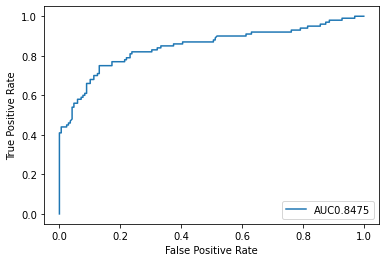

In [37]:
#Drawing Auc graph
plt.plot(fpr,tpr,label='AUC'+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show();

In [38]:
#Predicting the value of test data
data4=pd.read_csv("test (4).csv")

In [39]:
data4.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [40]:
data4=data4.fillna({'Age':value[0]})
data4=data4.fillna({"Fare":data['Fare'].mode()[0]})

In [41]:
data4.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [42]:
data_new4=data4.drop(['Cabin','PassengerId','Ticket'],inplace=False,axis=1)

In [43]:
data_new4

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,24.0,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,24.0,0,0,8.0500,S


In [44]:
Sex=pd.get_dummies(data_new4['Sex'])
Sex

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [45]:
Embarked=pd.get_dummies(data_new4['Embarked'])
Embarked.drop(['C'],axis=1,inplace=True)
Embarked

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [46]:
data5=data_new4.drop(['Embarked','Sex','Name'],axis=1)

In [47]:
data5=pd.concat([Embarked,Sex,data5],axis=1)

In [48]:
data5.shape

(418, 9)

In [49]:
X_train.shape

(623, 9)

In [50]:
y_pred_given_test=lr.predict(data5)
y_pred_given_test


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Decision Tree Algrithm

In [51]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier(max_leaf_nodes=10,max_depth=5)
regressor.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)

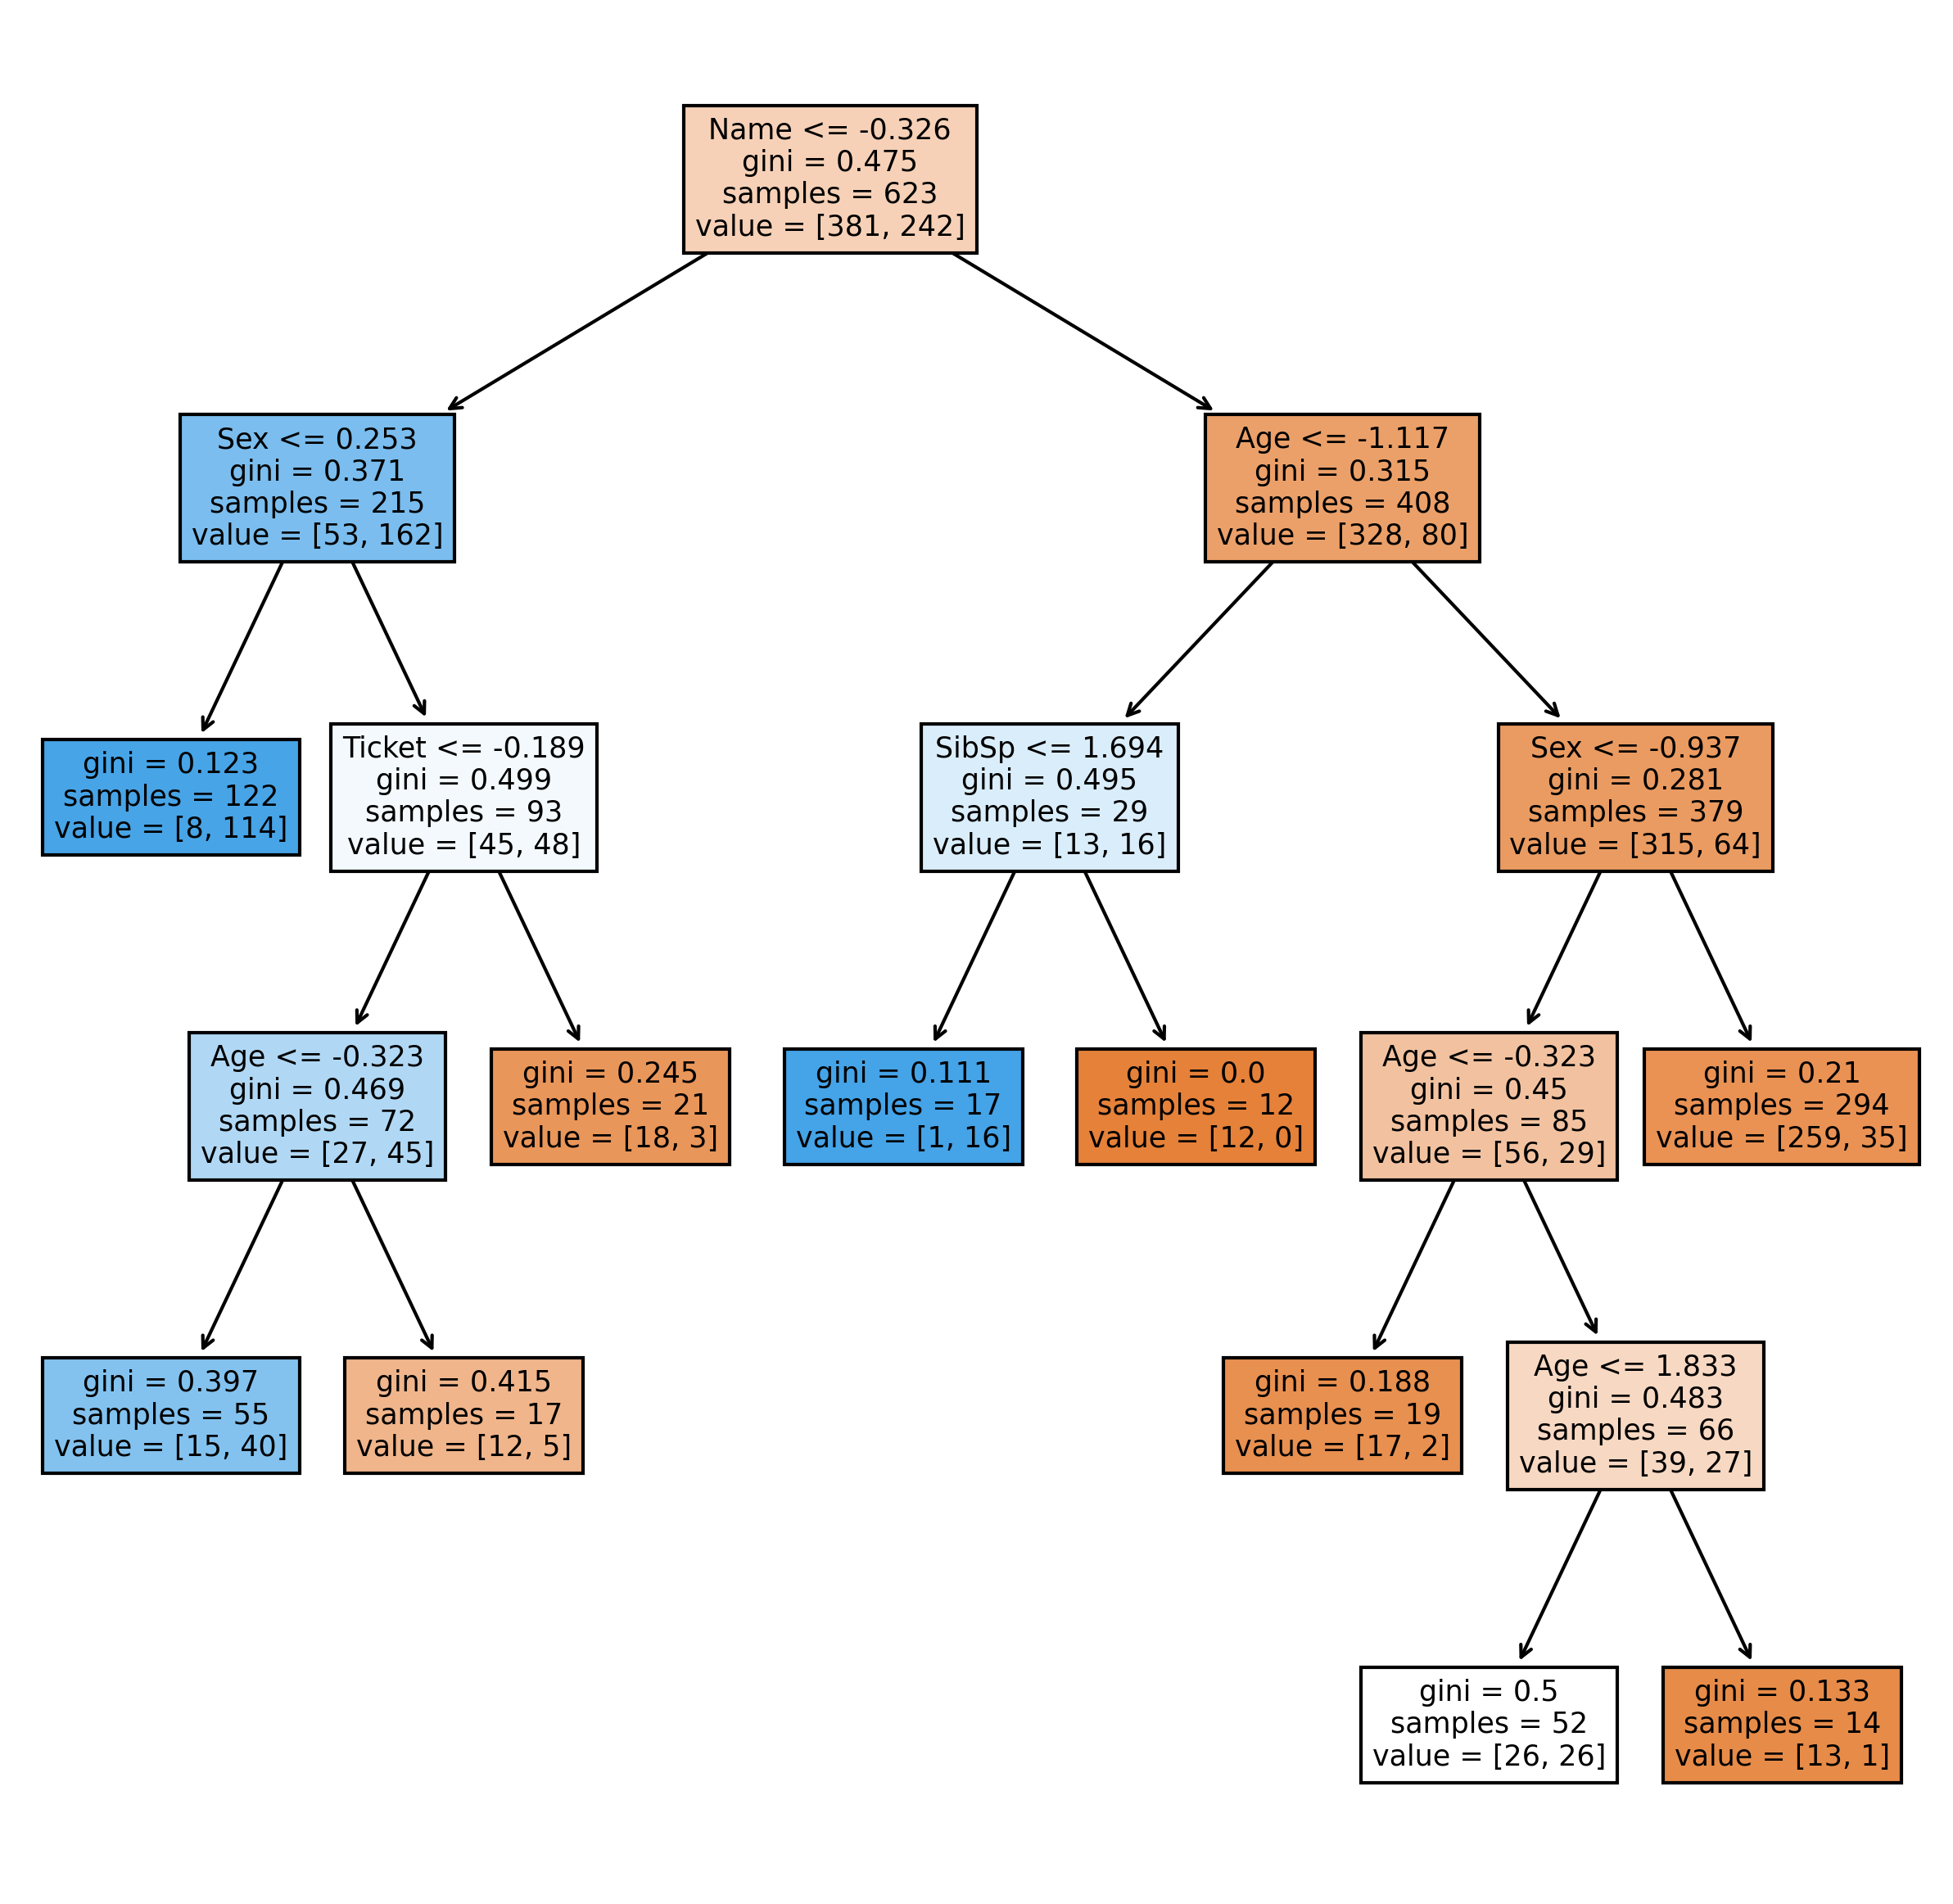

In [52]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10),dpi=300)
plot_tree(regressor,filled=True,feature_names=data.columns);

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
y_pred_test=regressor.predict(X_test)

In [55]:
confusion_matrix(Y_test,y_pred_test)

array([[158,  10],
       [ 39,  61]], dtype=int64)

In [56]:
accuracy_score(Y_test,y_pred_test)

0.8171641791044776